In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sb
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
X.shape

(100, 2)

In [3]:
from matplotlib import cm

def plot_silhouette(silhouette_vals, y_km):
    #silhouette_vals = result#shape(n_samples,)のndarray、各データ点のシルエット係数
    silhouette_avg = np.average(silhouette_vals)#float、シルエット係数の平均値
    #y_km = clf2.label_info #shape(n_samples,)のndarray、各データ点のクラスタラベル名
    cluster_labels = np.unique(y_km) #list、クラスタのラベル名のリスト
    n_clusters = len(cluster_labels)

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()

#### 【問題1】K-meansクラスの作成
非階層クラスタリングの手法であるK-meansのクラスを作成してください。名前はScratchKMeansとしてください。

In [4]:
import utils.ScratchKmean as cScratchKmean

In [5]:
clf = cScratchKmean.ScratchKMeans(4, 100, use_SSE=True)

In [6]:
result = clf.fit(X)

COMP! Condition1 Loop:9


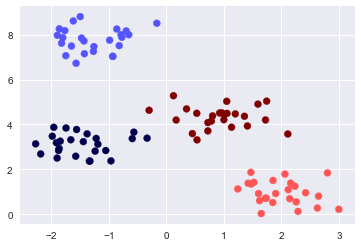

In [7]:
plt.scatter(X.T[0], X.T[1], c=result, cmap=cm.seismic)

#### 【問題2】エルボー法の実装
K-meansにおいて中心点の個数 
k
 は人為的に決める必要があるが、その判断方法としてエルボー法があります。
SSEを縦軸、クラスタ数 
k
 を横軸にした折れ線グラフを表示します。
このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

In [8]:
X.shape

(100, 2)

COMP! Condition1 Loop:5
COMP! Condition1 Loop:10
COMP! Condition1 Loop:11
COMP! Condition1 Loop:9


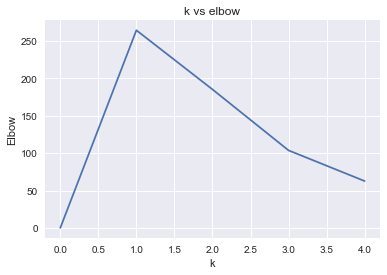

In [9]:
K_MAX = 5
SSE = np.zeros((K_MAX, 2))
for k in range(1, K_MAX):
    clf = cScratchKmean.ScratchKMeans(k, 100, use_SSE=True)
    result = clf.fit(X)
    see_log = clf.cal_SSE(X)
    SSE[k, 0] = k
    SSE[k, 1] = see_log
    #print(clf.label_info)
    #print(clf.center_info)
     
plt.plot(SSE[:,0], SSE[0:,1])
plt.title("k vs elbow")
plt.xlabel("k")
plt.ylabel("Elbow")

#### 【問題3】（アドバンス課題）シルエット図
コーディング
k
 を決める助けになるものとしてシルエット図もあります。
Matplotlibを使い可視化するコードは用意しました。以下を与えてくあさい。
silhouette_vals : shape(n_samples,)のndarray、各データ点のシルエット係数
silhouette_avg : float、シルエット係数の平均値
y_km : shape(n_samples,)のndarray、各データ点のクラスタラベル名
cluster_labels : list、クラスタのラベル名のリスト
n_clusters : int、クラスタ数
n
 番目のデータ点に対するシルエット係数 
s
n
 は以下の数式でを求められます。この数式を実装し、シルエット図を確認してください。

In [10]:
clf2 = cScratchKmean.ScratchKMeans(4, 100, use_SSE=True)

In [11]:
label = clf2.fit(X)

COMP! Condition1 Loop:9


In [12]:
#シルエット係数を求める
result = clf2.cal_silhouette(X)

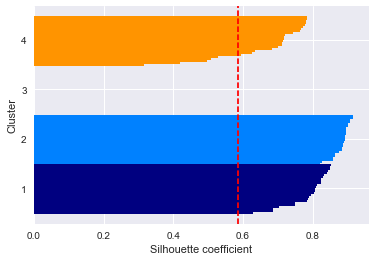

In [13]:
from matplotlib import cm

silhouette_vals = result#shape(n_samples,)のndarray、各データ点のシルエット係数
silhouette_avg = np.average(result)#float、シルエット係数の平均値
y_km = clf2.label_info #shape(n_samples,)のndarray、各データ点のクラスタラベル名
cluster_labels = np.unique(y_km) #list、クラスタのラベル名のリスト
n_clusters = len(cluster_labels)

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [14]:
label = clf2.label_info

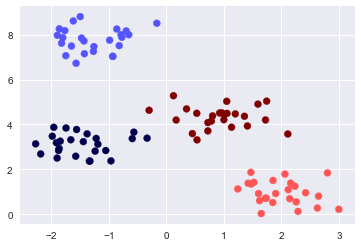

In [15]:
plt.scatter(X.T[0], X.T[1], c=label, cmap=cm.seismic)

### 卸売業者のデータ分析
クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。
UCI Machine Learning Repository: Wholesale customers Data Set
Data Folderの中からWholesale customers data.csvをダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。RegionとChannelは取り覗き、金額のデータでK-meansを利用します。

In [16]:
data_ori = pd.read_csv("Wholesale customers data.csv")
data_ori.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [17]:
data_to_use = data_ori[["Fresh","Milk","Grocery", "Frozen", "Detergents_Paper", "Delicassen"]]
data_channel_region = data_ori[["Channel","Region"]]

In [18]:
print("Channel=", np.unique(data_channel_region["Channel"].values))
print("Region=", np.unique(data_channel_region["Region"].values))

Channel= [1 2]
Region= [1 2 3]


#### 【問題4】クラスタ数kの選択
最適だと思われるクラスタ数 
k
 を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

###### 1. データセットより
データセットの中でChannel（Horeca or 小売）とRegionがカテゴリーデータである。
ChannelはHoreca(Hotel, Restrant, Cafe)とRetailの２種類で分類、RegionはLisbon、Oport、Other Regionの３種類で分類されている。
このことから、もしそれぞれのカテゴリー毎に特徴があるのならば、Channel 2 X Region 3 で少なくとも6つに分類されると考えられる

###### 2. エルボー図より
以下に出力したのエルボー図より、5~10の間に最適なクラスタ数がありそうだ。

###### 3.結論
1,2よりクラスタ数を10に設定する。クラスタ数10に設定した時のシルエット図を以下に示す。 

In [19]:
col = data_to_use.columns.values

In [20]:
data = data_to_use.values
print(data.shape)

(440, 6)


COMP! Condition1 Loop:5
COMP! Condition1 Loop:13
COMP! Condition1 Loop:23
COMP! Condition1 Loop:16
COMP! Condition1 Loop:25
COMP! Condition1 Loop:24
COMP! Condition1 Loop:26
COMP! Condition1 Loop:23
COMP! Condition1 Loop:32
COMP! Condition1 Loop:37
COMP! Condition1 Loop:20
COMP! Condition1 Loop:24
COMP! Condition1 Loop:23
COMP! Condition1 Loop:22
COMP! Condition1 Loop:21
COMP! Condition1 Loop:23
COMP! Condition1 Loop:35
COMP! Condition1 Loop:27
COMP! Condition1 Loop:28


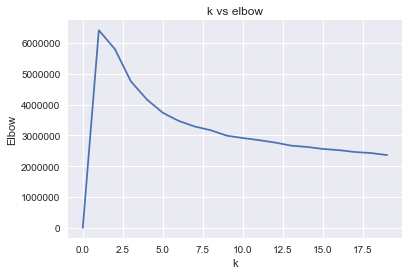

In [21]:
#エルボー図を出力
K_MAX = 20
SSE = np.zeros((K_MAX, 2))
shilhouette_vals = np.zeros((K_MAX, data.shape[0]))
y_km = np.zeros((K_MAX, data.shape[0]))
for k in range(1, K_MAX):
    clf3 = cScratchKmean.ScratchKMeans(k, 100, use_SSE=True)
    result = clf3.fit(data)
    see_log = clf3.cal_SSE(data)
    SSE[k, 0] = k
    SSE[k, 1] = see_log
     
plt.plot(SSE[:,0], SSE[0:,1])
plt.title("k vs elbow")
plt.xlabel("k")
plt.ylabel("Elbow")

In [22]:
#シルエット図を出力
clf4 = cScratchKmean.ScratchKMeans(10, 100, use_SSE=True)
result = clf4.fit(data)
silhouette_vals = clf4.cal_silhouette(data)
y_km = clf4.label_info

COMP! Condition1 Loop:37


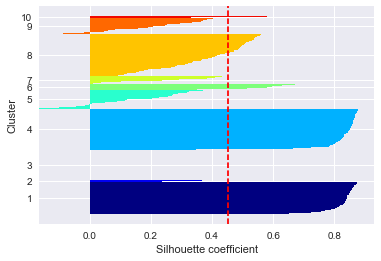

In [23]:
plot_silhouette(silhouette_vals, y_km)

#### PCAで次元削減を行なってみる

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)
print(data_pca)

[[ 6.50022122e+02  1.58551909e+03]
 [-4.42680498e+03  4.04245151e+03]
 [-4.84199871e+03  2.57876218e+03]
 [ 9.90346437e+02 -6.27980600e+03]
 [ 1.06579987e+04 -2.15972582e+03]
 [-2.76596159e+03 -9.59870727e+02]
 [-7.15550892e+02 -2.01300227e+03]
 [-4.47458367e+03  1.42949697e+03]
 [-6.71209540e+03 -2.20590916e+03]
 [-4.82363435e+03  1.34805592e+04]
 [-7.97482898e+03  5.71121893e+03]
 [ 3.63937790e+01 -6.03789641e+03]
 [ 1.99402021e+04  4.59128648e+03]
 [ 9.39669558e+03  5.91315704e+03]
 [ 1.26603704e+04  4.54194543e+03]
 [-2.99772590e+03 -6.09387930e+03]
 [-1.05895236e+04  6.58421594e+03]
 [-6.36709518e+03 -3.68071267e+03]
 [ 6.62382534e+03  1.25471953e+03]
 [-4.86153157e+03 -2.25592266e+02]
 [ 4.79424416e+03 -3.98879936e+03]
 [-7.24486684e+03 -7.34772325e+03]
 [ 1.92992657e+04 -6.93681068e+03]
 [ 1.99410882e+04  2.63126546e+04]
 [ 1.14930749e+04  6.17138651e+03]
 [ 3.30994467e+03 -1.16125675e+03]
 [-2.96863906e+03 -7.15886854e+03]
 [ 8.72160231e+02 -7.60388820e+03]
 [-4.89551897e+03  2

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


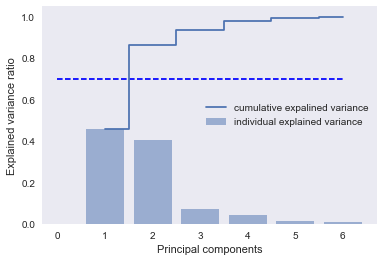

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

PCAで6次元から2次元へ次元削減を行なった。寄与率の算出結果から２次元でも元のデータの90%近くを説明可能である。

COMP! Condition1 Loop:5
COMP! Condition1 Loop:26
COMP! Condition1 Loop:34
COMP! Condition1 Loop:15
COMP! Condition1 Loop:23
COMP! Condition1 Loop:24
COMP! Condition1 Loop:27
COMP! Condition1 Loop:25
COMP! Condition1 Loop:33
COMP! Condition1 Loop:34
COMP! Condition1 Loop:31
COMP! Condition1 Loop:30
COMP! Condition1 Loop:31
COMP! Condition1 Loop:40
COMP! Condition1 Loop:35
COMP! Condition1 Loop:45
COMP! Condition1 Loop:41
COMP! Condition1 Loop:18
COMP! Condition1 Loop:20


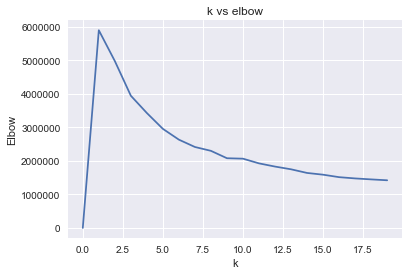

In [27]:
K_MAX = 20
SSE = np.zeros((K_MAX, 2))
shilhouette_vals = np.zeros((K_MAX, data_pca.shape[0]))
y_km = np.zeros((K_MAX, data_pca.shape[0]))
for k in range(1, K_MAX):
    clf3 = cScratchKmean.ScratchKMeans(k, 100, use_SSE=True)
    result = clf3.fit(data_pca)
    see_log = clf3.cal_SSE(data_pca)
    SSE[k, 0] = k
    SSE[k, 1] = see_log
     
plt.plot(SSE[:,0], SSE[0:,1])
plt.title("k vs elbow")
plt.xlabel("k")
plt.ylabel("Elbow")

エルボー図からクラスタ数10付近が妥当そうだ。

#### 【問題5】既知のグループとの比較
RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください

###### 比較結果
ChannelについてはChannel=1と2のグループに分かれている。Regionについてはグループ毎の特徴は見られない。  
10個のクラスタに分類した結果、大まかにChannel=1,2ともにさらにそれぞれ５つのグループに分けることができそうだ。

In [28]:
clf3 = cScratchKmean.ScratchKMeans(10, 100, use_SSE=True)

In [29]:
result = clf3.fit(data_pca)

COMP! Condition1 Loop:34


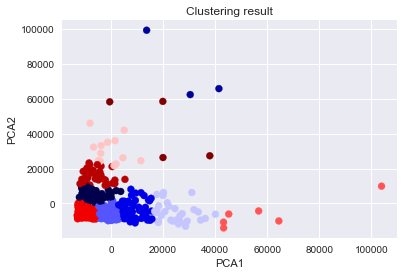

In [30]:
plt.scatter(data_pca.T[0], data_pca.T[1], c=result, cmap=cm.seismic)
plt.title("Clustering result")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

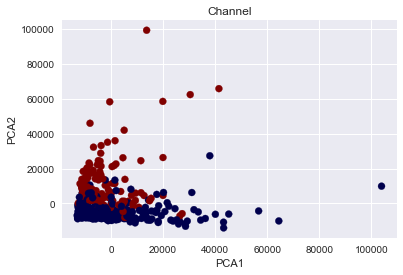

In [31]:
plt.scatter(data_pca.T[0], data_pca.T[1], c=data_channel_region["Channel"], cmap=cm.seismic)
plt.title("Channel")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

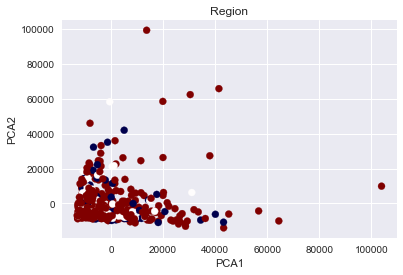

In [32]:
plt.scatter(data_pca.T[0], data_pca.T[1], c=data_channel_region["Region"], cmap=cm.seismic)
plt.title("Region")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

#### 【問題6】卸売業者にとって有益な情報
卸売業者にとって有益な情報を探し出し文章にまとめてください。

各クラスタ毎に各特徴量の売り上げ金額（"Fresh","Milk","Grocery", "Frozen", "Detergents_Paper", "Delicassen", "Total"）を調べ、どのグループにどのような商品が求められているか調べる。

In [33]:
#元データにトータルの売り上げとクラスタ番号を追加する
data_new = data_ori.copy(deep=True)
data_new["Total"] = data_new[["Fresh","Milk","Grocery", "Frozen", "Detergents_Paper", "Delicassen"]].sum(axis=1)
data_new["cluster"] = result
data_new.head

<bound method NDFrame.head of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
5          2       3   9413   8259     5126     666              1795   
6          2       3  12126   3199     6975     480              3140   
7          2       3   7579   4956     9426    1669              3321   
8          1       3   5963   3648     6192     425              1716   
9          2       3   6006  11093    18881    1159              7425   
10         2       3   3366   5403    12974    4400              5977   
11         2       3  13146   1124     4523    1420               549   
12         2       3 

In [34]:
def plot_total(data_source, col_name):
    
    #クラスタ毎に売り上げの平均値を算出
    average_sales = data_source.groupby("cluster", as_index=False).mean()
    
    #Bar plot
    plt.figure(figsize=(25,5))
    plt.bar(average_sales.index, average_sales[col_name], color="Blue")
    plt.xlabel("cluster", fontsize=16)
    plt.ylabel("{} ave sales".format(col_name), fontsize=16)
    plt.title("{} Average sales".format(col_name))
    plt.tight_layout()
    
    for x, y in zip(average_sales.index, average_sales[col_name]):
        plt.text(x, y, str("{:.2f}").format(y), ha='center', va='bottom')
        plt.xticks(average_sales.index, average_sales["cluster"]) #x軸を実際のデータラベルへ置き換え
    
    plt.show()

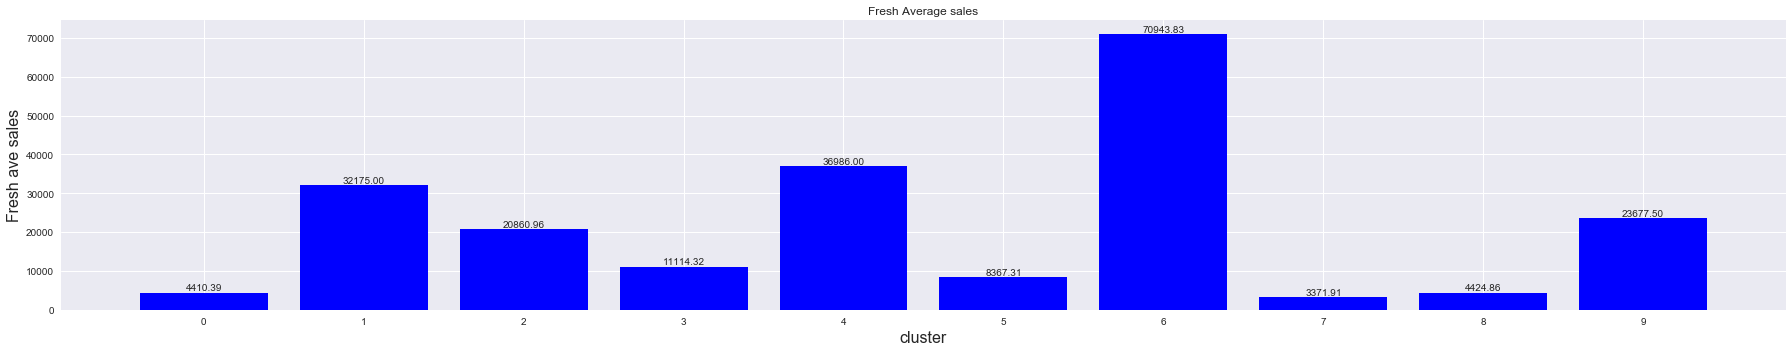

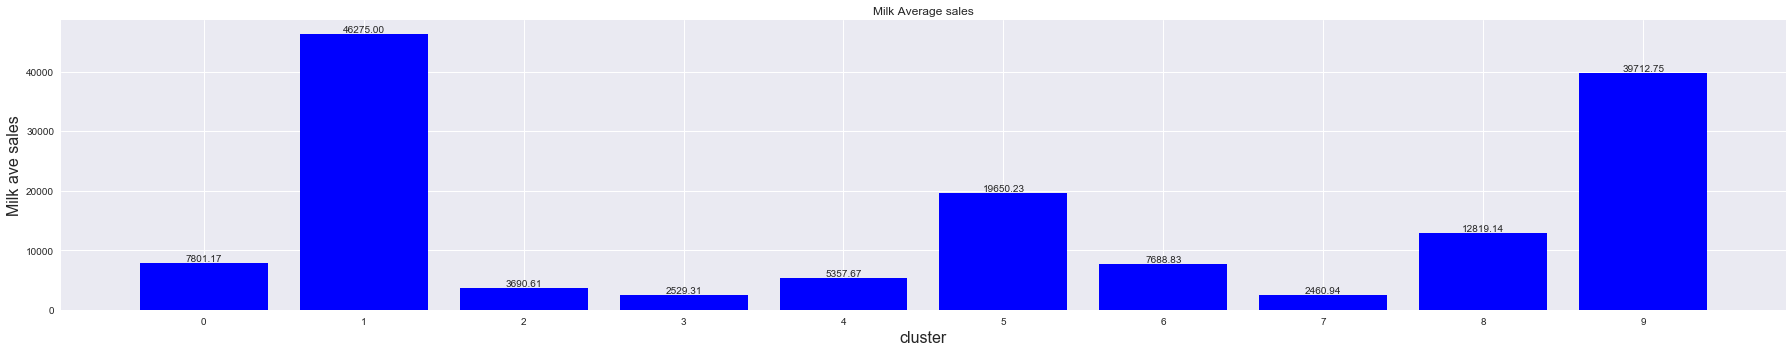

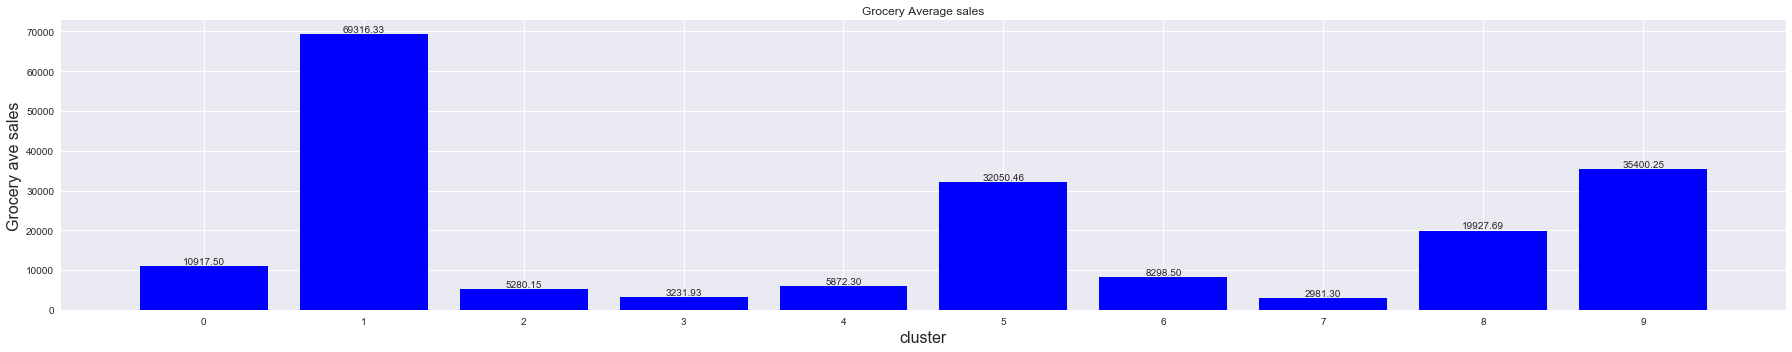

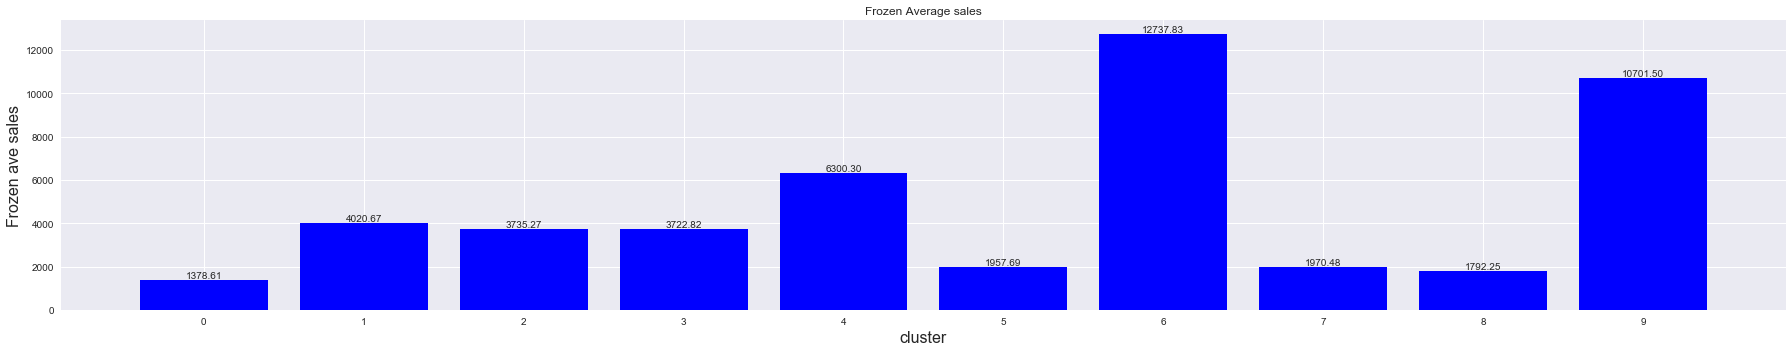

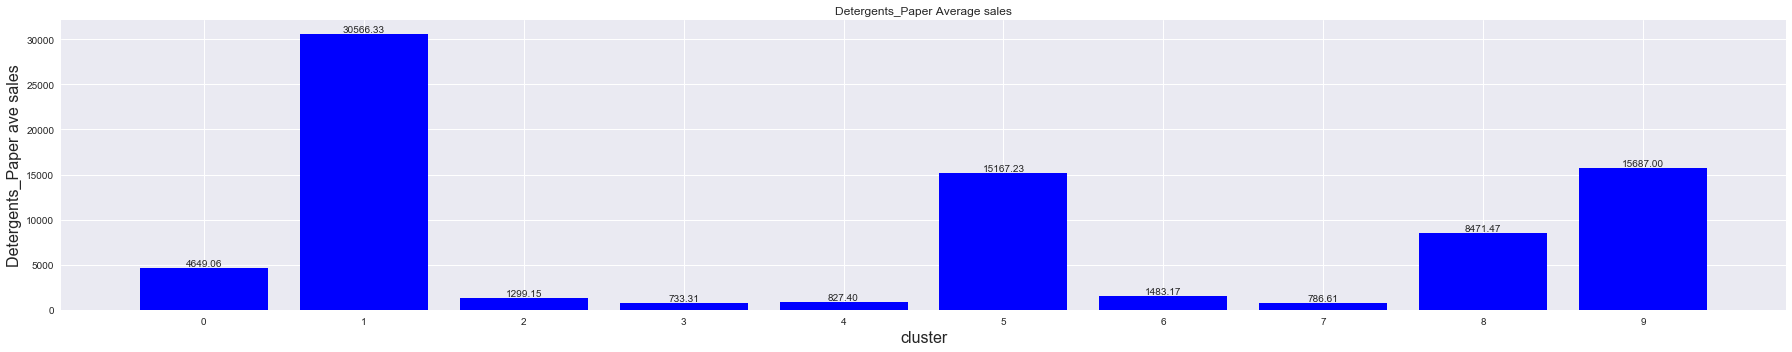

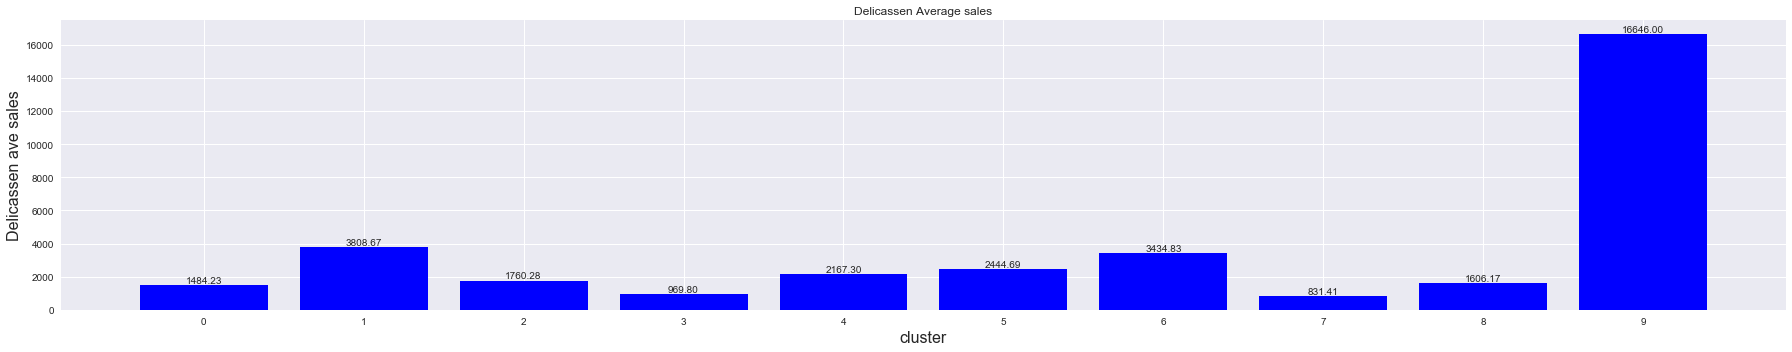

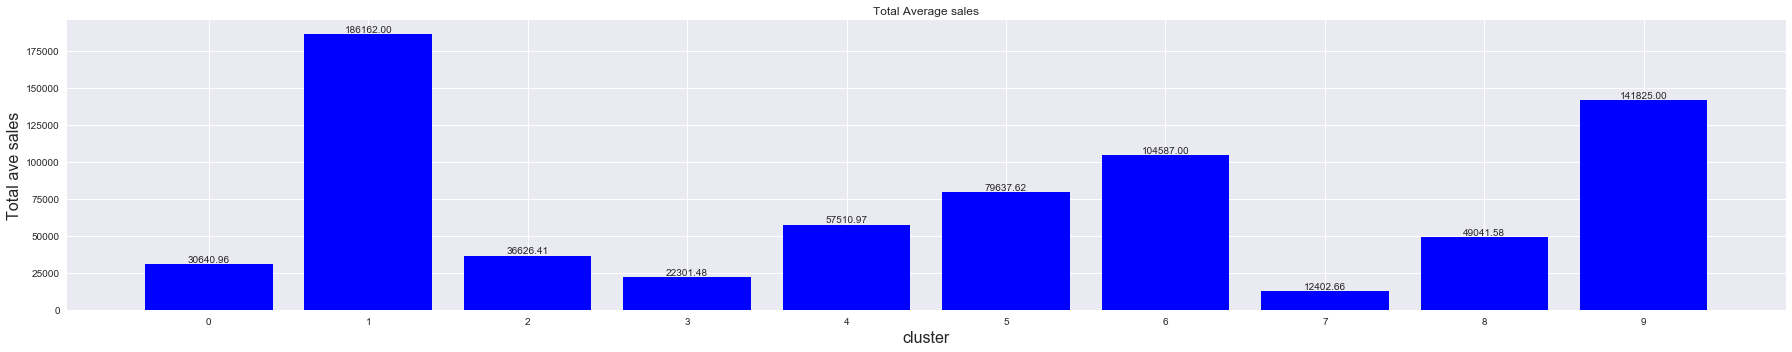

In [35]:
col_list = ["Fresh","Milk","Grocery", "Frozen", "Detergents_Paper", "Delicassen", "Total"]
for col in col_list:
    plot_total(data_new, col)

##### Fresh
生鮮食品はCluster 6で売り上げが高い
##### Milk
乳製品はCluster 1で売り上げが高い
##### Grocery
その他食品関連製品はCluster 1で売り上げが高い
##### Frozen
冷凍食品はCluster 6で売り上げが高い
##### Detergents_Paper
洗剤はCluster 1で売り上げが高い
##### Delicassen
惣菜はCluster 9で売り上げが高い
##### Total
トータルではCluster 1の売り上げ一番高い

#### 【問題7】（アドバンス課題）他の手法の調査
今回扱ったK-means以外に非階層クラスタリングで有名な手法としては DBSCAN 、
PCA以外に次元削減手法で有名な手法としては t-SNE や LLE があります。
DBSCANのメリット・デメリット
t-SNE、LLEのメリット・デメリット
について記述してください。

#### DBSCANのメリット・デメリット
###### メリット
1. k-meansと違って，最初にクラスタ数を決めなくてよい
2. 外れ値の影響を受けづらい
3. パラメーターが２つだけ

###### デメリット
1. データが密集している場合はパラメータを決めるのが難しい。１つの点をクラスタとしてしまう。

#### t-SNEのメリット・デメリット
###### メリット
1. 高次元空間上で非線形構造を持っているデータに対しても使える

###### デメリット  
1. うまくいくことが保証されているのは2or3次元への圧縮のみ  
2. 局所構造が次元の呪いの影響を受けやすい  
3. 最適化アルゴリズムの収束性が保証されていない  


#### LLEのメリット・デメリット
###### メリット
1. 高次元空間上で非線形構造を持っているデータに対しても使える

###### デメリット

#### 【問題8】（アドバンス課題）t-SNEとDBSCANの利用
Wholesale customersのデータに対して、PCAではなく、 t-SNE を用いて次元削減をしてください。さらにK-meansではなく、 DBSCAN を用いてクラスタリングしてください。
そのクラスタリング結果をPCA+kmeansの場合の結果と比較してみましょう。実装にはscikit-learnを用いてください。